# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import tensorflow as tf
import glob
import pickle

# Loading the Pickle File

In [2]:
file_path="/Users/gouravdeepsingh/Documents/AIMT-sem3/Capstone/model_80x80.pkl"
with open(file_path,'rb') as file:
    loaded_model=pickle.load(file)

In [3]:
# Load the array from the file
normalized_features = np.load('raw_features_MainDataset_80x80.npy')
print(normalized_features.shape)

(44441, 256)


In [4]:
# target_size = (224, 224)
target_size = (80, 80)

# Calculating Similarity

In [5]:
similarity_scores_list = []
def get_similar_images(image_index, cosine_similarities, top_n=5):
    global similarity_scores_list
    # Get the pairwise similarity scores for the given image index
    similarity_scores = list(enumerate(cosine_similarities[image_index]))

    # Sort the images based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores_list = similarity_scores
    # Get the top similar images
    top_similar_images = similarity_scores[1:top_n+1]

    # Return the indices of the top similar images
    similar_image_indices = [index for index, _ in top_similar_images]
    print(similar_image_indices)

    return similar_image_indices 

# Getting the Image

In [6]:
input_image_path = 'WhatsApp Image 2023-07-22 at 6.03.33 PM.jpeg'
#input_image_path = 'WhatsApp Image 2023-07-22 at 6.47.45 PM.jpeg'


images = []
input_image = cv2.imread(input_image_path)
image = cv2.resize(input_image, target_size)

In [7]:
#Converting the image and appending it with other features for calculating score
images.append(image)
resize_input = np.array(images)

features = loaded_model.predict(resize_input)

input_normalized_features = normalize(features)
#input_normalized_features = features

updated_features = np.vstack((normalized_features,input_normalized_features))

1/1 [==============================] - 0s 36ms/step


In [8]:
type(updated_features),updated_features.shape,updated_features.nbytes/(1024 ** 3)

(numpy.ndarray, (44442, 256), 0.08476638793945312)

In [9]:
# Normalize the data to unit length along the last axis (axis=1)
data_normalized = updated_features / np.linalg.norm(updated_features, axis=1, keepdims=True)

# Compute cosine similarity using matrix multiplication
cosine_similarities = np.dot(data_normalized, data_normalized.T)


In [10]:
cosine_similarities[-1]

array([0.94744066, 0.93403317, 0.93655446, ..., 0.92719172, 0.93445506,
       1.        ])

In [11]:
cosine_similarities.shape

(44442, 44442)

# Recommendation

[21319, 16742, 21381, 3954, 1580]
Input Image:


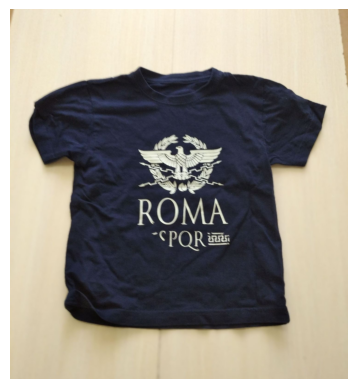

Similar Images:


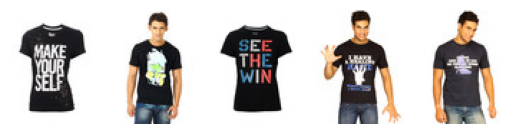

In [12]:
image_dir = 'images'
image_paths = glob.glob(image_dir + '/*.jpg')

image_index = -1
similar_image_indices = get_similar_images(image_index, cosine_similarities)
 
# Retrieve the details of the similar images from the image paths
similar_images = [image_paths[index] for index in similar_image_indices]

print('Input Image:')
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print('Similar Images:')
# Display the recommended similar images
for i, image_path in enumerate(similar_images):
    image = cv2.imread(image_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

In [13]:
similar_image_indices

[21319, 16742, 21381, 3954, 1580]

In [14]:
similarity_scores_list

[(44441, 1.0000000000000002),
 (21319, 0.9720091390563739),
 (16742, 0.9697919580746868),
 (21381, 0.9693606043019347),
 (3954, 0.9678848832700482),
 (1580, 0.9676716482265162),
 (15103, 0.9675178615391155),
 (43312, 0.967345288635389),
 (38657, 0.9669376073068695),
 (25930, 0.966828895530214),
 (3261, 0.9667456824208467),
 (26630, 0.9665285086943134),
 (16648, 0.9663911960947016),
 (27628, 0.9662286993165594),
 (5225, 0.9660834195330628),
 (34327, 0.9660727588367258),
 (21095, 0.9660053660596335),
 (25330, 0.965815641668478),
 (385, 0.9657403337800368),
 (6584, 0.9654211191511799),
 (205, 0.9652868750604797),
 (1220, 0.9652839898587908),
 (12868, 0.965224761428912),
 (6691, 0.9652033259192112),
 (17385, 0.9651520115509158),
 (18519, 0.9651418980198958),
 (12313, 0.9651042912828849),
 (2898, 0.9649982669080828),
 (30176, 0.9646980546366928),
 (44291, 0.9646925843035453),
 (17992, 0.9646405160033377),
 (35875, 0.9646085914675832),
 (19888, 0.964493381425662),
 (9897, 0.9644915193348848)